In [1]:
%cd C:\Users\jigna\

C:\Users\jigna


In [2]:
# 1 (1 point)

# Use pandas function read_csv to load data from the file 'GermanCredit.csv' into a dataframe named 'data'.
# The file can be downloaded from the Week 4 module in Brightspace.

import pandas as pd
data = pd.read_csv('GermanCredit.csv')
data


,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
996,30,3857,4,4,40,1,1,0,1,Good,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,1,1,Good,...,0,0,1,0,1,0,0,0,1,0
998,45,1845,4,4,23,1,1,0,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
# 2 (1 point)

# Write python code to prepare data for classification models in scikit-learn by dividing 
# it into train and test data sets. This model will be used to predict the value of Class
# based on other fields in the data set. Your y_train and y_test data sets should include
# the column Class from GermanCredit.csv and your X_train and X-test data sets should
# include all columns except the Class column.

from sklearn.model_selection import train_test_split

y = data['Class']
X = pd.get_dummies(data.copy().drop(columns=['Class']), drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\jigna\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# 3 (1 point)

# Use a column transformer to update X_train so that all of its columns are standardized to have a 
# minimum value of zero and maximum value of one. Use the MinMaxScaler() function in scikit-learn to 
# do this. After transformation, X_train should be a dataframe containing the transformed data with 
# column names defined by the get_feature_names_out() function of the column transformer.

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

str_vars = [] # String variables
num_vars = [] # Numeric variables
for i in X.columns:
    if data.dtypes[i] == 'object':
        str_vars.append(i)
    else:
        num_vars.append(i)

ct = make_column_transformer(
    (MinMaxScaler(), num_vars),
    (OneHotEncoder(sparse=False), str_vars)
)

ct.fit(X_train)
X_train = pd.DataFrame(ct.transform(X_train), columns=ct.get_feature_names_out())

In [5]:
# 4 (2 points)

# Use the transformed X_train dataset with k-fold cross-validation to train a Decision Tree classification
# model for several values of max_depth (1, 2, 3, 4, 5, 6, 7, 8, 9, 10). Which max_depth value gives the 
# best cross-validation score? What is the mean cross-validation score for the best Decision Tree 
# classification model based on this data set?

# Write your answers to the questions above as comments in the body of this cell.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    # Create linear regression object
    clsr = DecisionTreeClassifier(max_depth=k)

    # Define k-fold cross validatation
    kfold = StratifiedKFold(n_splits=5)
    
    #res = cross_validate(clsr, X_train, y_train, cv=kfold, return_train_score=True)
    #display(res)
    summary = cross_val_score(clsr, X_train, y_train, cv=kfold)
    print("Mean cross-validation scores with k = {}: {:.3f}".format(k, summary.mean()))
        
    ###########
    
    # max_depth value of 4 gives the best cross-validation score of 0.703

Mean cross-validation scores with k = 1: 0.699
Mean cross-validation scores with k = 2: 0.700
Mean cross-validation scores with k = 3: 0.692
Mean cross-validation scores with k = 4: 0.704
Mean cross-validation scores with k = 5: 0.689
Mean cross-validation scores with k = 6: 0.688
Mean cross-validation scores with k = 7: 0.681
Mean cross-validation scores with k = 8: 0.673
Mean cross-validation scores with k = 9: 0.675
Mean cross-validation scores with k = 10: 0.676


In [6]:
# 5 (2 points)

# Use the transformed X_train dataset with k-fold cross-validation to train a k-Nearest Neighbors 
# classification model for several values of k (1, 2, 3, 4, 5, 6, 7, 8, 9, 10). Which n_neighbors value gives the 
# best cross-validation score? What is the mean cross-validation score for the best k-NN classification model 
# based on this data set?

# Write your answers to the questions above as comments in the body of this cell.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

for k in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    # Create linear regression object
    clsr = KNeighborsClassifier(n_neighbors=k)

    # Define k-fold cross validatation
    kfold = StratifiedKFold(n_splits=5)
    
    #res = cross_validate(clsr, X_train, y_train, cv=kfold, return_train_score=True)
    #display(res)
    summary = cross_val_score(clsr, X_train, y_train, cv=kfold)
    print("Mean cross-validation scores with k = {}: {:.3f}".format(k, summary.mean()))
        
    ###########
    
    # n_neighbors value of 5 gives the best cross-validation score of 0.729

Mean cross-validation scores with k = 1: 0.704
Mean cross-validation scores with k = 2: 0.655
Mean cross-validation scores with k = 3: 0.723
Mean cross-validation scores with k = 4: 0.703
Mean cross-validation scores with k = 5: 0.729
Mean cross-validation scores with k = 6: 0.704
Mean cross-validation scores with k = 7: 0.707
Mean cross-validation scores with k = 8: 0.692
Mean cross-validation scores with k = 9: 0.719
Mean cross-validation scores with k = 10: 0.713


In [7]:
# 6 (2 points)

# Use the transformed X_train dataset with k-fold cross-validation to train a Logistic Regression 
# classification model for several values of C (0.4, 0.6, 0.8, 1.0, 1.2). Which C value gives the 
# best cross-validation score? What is the mean cross-validation score for the best Logistic Regression
# classification model based on this data set?

# Write your answers to the questions above as comments in the body of this cell.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

# Use cross-validation
for i in [0.4, 0.6, 0.8, 1.0, 1.2]:
    # Create linear regression object
    clsr = LogisticRegression(C=i, penalty='l1', solver='liblinear', max_iter=1000)

    # Define k-fold cross validatation
    kfold = StratifiedKFold(n_splits=5)
    
    #res = cross_validate(clsr, X_train, y_train, cv=kfold, return_train_score=True)
    #display(res)
    summary = cross_val_score(clsr, X_train, y_train, cv=kfold)
    print("Mean cross-validation scores with C = {}: {:.3f}".format(i, summary.mean()))
    
    ###########
    
    # C value of 0.8 gives the best cross-validation score of 0.767

Mean cross-validation scores with C = 0.4: 0.761
Mean cross-validation scores with C = 0.6: 0.764
Mean cross-validation scores with C = 0.8: 0.767
Mean cross-validation scores with C = 1.0: 0.764
Mean cross-validation scores with C = 1.2: 0.761


In [8]:
# 7 (2 points)

# From the results of questions 4, 5 and 6, choose the model that is most likely to generalize
# best on the X_test data set. Train the model using the complete X_train data and evaluate the
# model using the X_test data set.
    
###########

# I believe the Logistic Regression model is most likely to generalize best on the X_test set
    
###########
    
# Create logistic regression object
clsr = LogisticRegression(C=0.8, penalty='l1', solver='liblinear', max_iter=1000)

# Train the model using the training sets
clsr.fit(X_train, y_train)

print("Training set score: {:.3f}".format(clsr.score(X_train, y_train)))

# Load and process test data
y_test = new_data['Class']
X_test = new_data.copy().drop(columns=['Class'])

X_test= pd.DataFrame(ct.transform(X_test), columns=ct.get_feature_names_out())
X_test

print("Test set score: {:.3f}".format(clsr.score(X_test, y_test)))

Training set score: 0.785
Test set score: 0.772


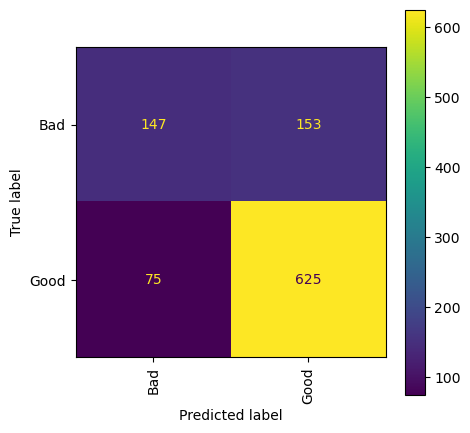

In [12]:
# 8 (1 point)

# Calculate predicted values of Class from the variables in X_test and
# display the confusion matrix calculated from the test data

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = clsr.predict(X_test)
plt.rcParams['figure.figsize'] = (5, 5)
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=clsr.classes_[[0, 1]])
disp.plot(xticks_rotation=90)

In [13]:
# 9 (1 point)

# Print the classification report based on the actual an predicted values 
# in the test data set

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.66      0.49      0.56       300
        Good       0.80      0.89      0.85       700

    accuracy                           0.77      1000
   macro avg       0.73      0.69      0.70      1000
weighted avg       0.76      0.77      0.76      1000



In [ ]:
# 10 (2 points)

# Comment on the effectiveness of this model for predicting Class in the GermanCredit data.
# What are the model's strengths and weaknesses? How does this model compare to a poor 
# baseline model that simply always predicts the value 'Good'?

# No code is required in this section, but if you use code to help yourself answer these questions,
# go ahead and include it here.

# Write your answers as comments in the body of this cell.

#######

# Going by the training and test scores of roughly 0.78 and 0.77 respectively, I would say the Logistic Regression model
# is moderately effective when it comes to predicting Class in the GermanCredit data. The model was similarly implemented 
# like the KNN and Decision Tree models but had better accuracy scores for this case. Compared to a model that always predicts 
# 'Good' (maybe right 50% of the time since it is only one of two options), the Logistic Regression model is accurate 77% of 
# the time making it a far better model.